<a href="https://colab.research.google.com/github/555Chaithanya/Machine-Learning/blob/main/IBM_AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
EMPLOYEE BURNOUT ANALYSIS

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pd.set_option("display.max_columns",None)
df=pd.read_csv("/content/drive/MyDrive/Internship/employee_burnout_analysis.csv")
df

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,30-12-2008,Female,Service,No,1,3.0,NaN,0.41
22746,fffe33003000350031003800,19-01-2008,Female,Product,Yes,3,6.0,6.7,0.59
22747,fffe390032003000,05-11-2008,Male,Service,Yes,3,7.0,NaN,0.72
22748,fffe33003300320036003900,10-01-2008,Female,Service,No,2,5.0,5.9,0.52


In [ ]:
df["Date of Joining"]=pd.to_datetime(df["Date of Joining"])

In [ ]:
df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
df.shape

(22750, 9)

In [ ]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
df.head(5)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-10-03,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-03-11,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
df.isna().sum()# checking for null values

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
#Checking for Duplicate values
df.duplicated().sum()

0

In [ ]:
for i, col in enumerate(df.columns):
  print(f"\n\n{df[col].unique()}")
  print(f"\n\{df[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

\fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-10-03T00:00:00.000000000' '2008-03-11T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-02-01T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-09-03T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-12-05T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008

In [ ]:
#drop unused columns
df=df.drop(["Employee ID"],axis=1)

In [ ]:
#Feature Evaluation
intfloatdf=df.select_dtypes([np.int,np.float])
for i,col in enumerate(intfloatdf.columns):
  if(intfloatdf[col].skew() >=0.1):
    print("\n",col,"Feature is positively skewed and value is :",intfloatdf[col].skew())
  elif(intfloatdf[col].skew() <= -0.1):
    print("\n",col,"Feature is Negatively skewed and value is :",intfloatdf[col].skew())
  else:
    print("\n",col,"Feature is Normally skewed and value is :",intfloatdf[col].skew())


 Designation Feature is Normally skewed and value is : 0.09242138478903683

 Resource Allocation Feature is positively skewed and value is : 0.20457273454318103

 Mental Fatigue Score Feature is Negatively skewed and value is : -0.4308950578815428

 Burn Rate Feature is Normally skewed and value is : 0.045737370909640515


In [ ]:
#replacing null values with mean
df["Resource Allocation"].fillna(df["Resource Allocation"].mean(),inplace=True)
df["Mental Fatigue Score"].fillna(df["Mental Fatigue Score"].mean(),inplace=True)
df["Burn Rate"].fillna(df["Burn Rate"].mean(),inplace=True)

In [ ]:
#verifying data for null values
df.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
#defining the correlation
cor=df.corr()
cor

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


In [ ]:
#Correlation Plot
sns.set(rc={"figure.figsize":(5,8)})
fig=px.imshow(cor,text_auto=True,aspect="auto")
fig.show()

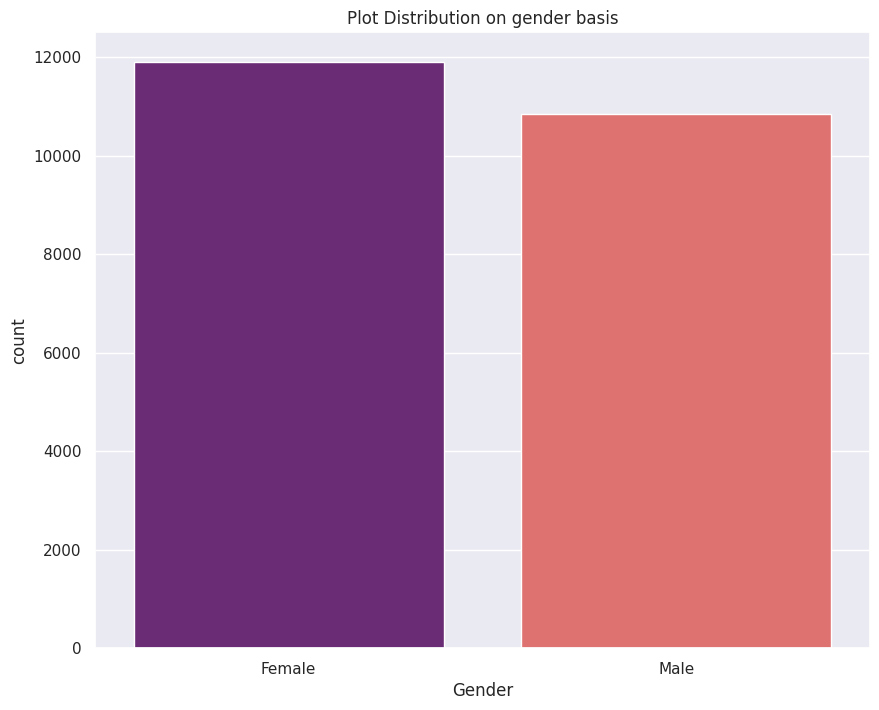

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x="Gender", data=df, palette="magma" )
plt.title("Plot Distribution on gender basis")
plt.show()

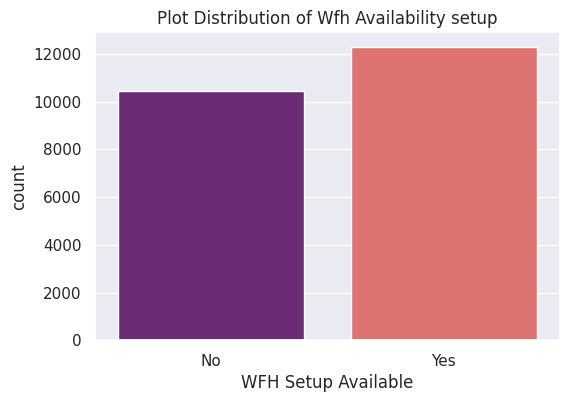

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="WFH Setup Available",data=df,palette="magma")
plt.title("Plot Distribution of Wfh Availability setup")
plt.show()

In [ ]:
#Histogram distribution for count plot of attributes
burn_st=df.loc[:,"Date of Joining":"Burn Rate"]
burn_st=burn_st.select_dtypes([int,float])
for i,col in enumerate(burn_st.columns):
  fig=px.histogram(burn_st,x=col,title="plot distribution of the "+col,color_discrete_sequence=["green"])
  fig.update_layout(bargap=0.3)
  fig.show()

In [ ]:
#designation based plot on distribution of _burn rate_
plt.figure(figsize=(6,4))
fig=px.line(df,y="Burn Rate",color="Designation", title="Burn rate on basis of Designation", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.5)
fig.show()

<Figure size 600x400 with 0 Axes>

In [ ]:
#designation based plot on distribution of _mental fatigue_
fig=px.line(df,y="Mental Fatigue Score",color="Designation", title="Burn rate on basis of Designation", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.4)
fig.show()

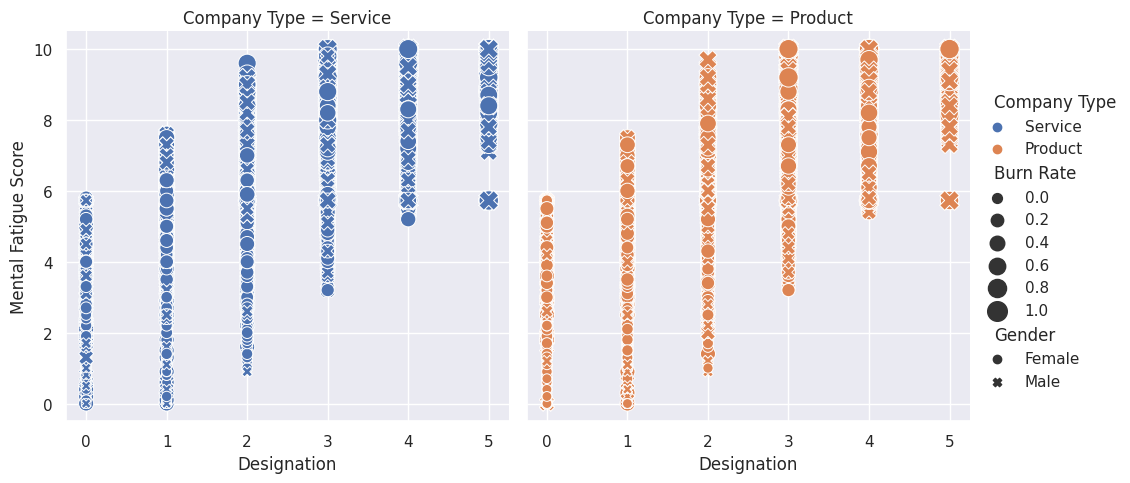

In [ ]:
sns.relplot(
    data=df,x="Designation" ,y="Mental Fatigue Score", col="Company Type", hue="Company Type", size="Burn Rate", style="Gender", sizes=(50,200)
)

In [ ]:
#Label Encoding

In [ ]:
from sklearn import preprocessing
label_encode=preprocessing.LabelEncoder()

In [ ]:
#transforming variables
df["GenderLabel"]=label_encode.fit_transform(df["Gender"].values)
df["Company_TypeLabel"]=label_encode.fit_transform(df["Company Type"].values)
df["WFH_Setup_AvailableLabel"]=label_encode.fit_transform(df["WFH Setup Available"].values)

In [ ]:
#checking asignmed values
#=>
gd=df.groupby("Gender")
gd=gd["GenderLabel"]
print(gd.first())
print("\n")
#=>
ct=df.groupby("Company Type")
ct=ct["Company_TypeLabel"]
print(ct.first())
print("\n")
#=>
wfh=df.groupby("WFH Setup Available")
wfh=wfh["WFH_Setup_AvailableLabel"]
print(wfh.first())

Gender
Female    0
Male      1
Name: GenderLabel, dtype: int64


Company Type
Product    0
Service    1
Name: Company_TypeLabel, dtype: int64


WFH Setup Available
No     0
Yes    1
Name: WFH_Setup_AvailableLabel, dtype: int64


In [ ]:
df.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
0,2008-09-30,Female,Service,No,2,3.000000,3.8,0.16,0,1,0
1,2008-11-30,Male,Service,Yes,1,2.000000,5.0,0.36,1,1,1
2,2008-10-03,Female,Product,Yes,2,4.481398,5.8,0.49,0,0,1
3,2008-03-11,Male,Service,Yes,1,1.000000,2.6,0.20,1,1,1
4,2008-07-24,Female,Service,No,3,7.000000,6.9,0.52,0,1,0


In [ ]:
df.tail(5)

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
22745,2008-12-30,Female,Service,No,1,3.0,5.728188,0.41,0,1,0
22746,2008-01-19,Female,Product,Yes,3,6.0,6.700000,0.59,0,0,1
22747,2008-05-11,Male,Service,Yes,3,7.0,5.728188,0.72,1,1,1
22748,2008-10-01,Female,Service,No,2,5.0,5.900000,0.52,0,1,0
22749,2008-06-01,Male,Product,No,3,6.0,7.800000,0.61,1,0,0


In [ ]:
#Feature Selection
cols=["Designation","Resource Allocation","Mental Fatigue Score",
         "GenderLabel","Company_TypeLabel","WFH_Setup_AvailableLabel"]
X=df[cols]
y=df["Burn Rate"]

In [ ]:
X

,Designation,Resource Allocation,Mental Fatigue Score,GenderLabel,Company_TypeLabel,WFH_Setup_AvailableLabel
0,2,3.000000,3.800000,0,1,0
1,1,2.000000,5.000000,1,1,1
2,2,4.481398,5.800000,0,0,1
3,1,1.000000,2.600000,1,1,1
4,3,7.000000,6.900000,0,1,0
...,...,...,...,...,...,...
22745,1,3.000000,5.728188,0,1,0
22746,3,6.000000,6.700000,0,0,1
22747,3,7.000000,5.728188,1,1,1
22748,2,5.000000,5.900000,0,1,0


In [ ]:
y

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64

In [ ]:
#Principle Component Analysis
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X)
print("Pca Shape:",X_pca.shape,"Vs Original Shape:",X.shape)
print("Percentage of Importance of selected features are :", pca.explained_variance_ratio_)
print("No. of features selected through PCA are ",pca.n_components)

Pca Shape: (22750, 4) Vs Original Shape: (22750, 6)
Percentage of Importance of selected features are : [0.78371089 0.11113597 0.03044541 0.02632422]
No. of features selected through PCA are  0.95


In [ ]:
#Splitting Data using train_test_split
from sklearn.model_selection import train_test_split
X_train_pca, X_test, Y_train, Y_test=train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [ ]:
X_train_pca.shape

(18200, 4)

In [ ]:
X_test.shape

(4550, 4)

In [ ]:
Y_train.shape

(18200,)

In [ ]:
Y_test.shape

(4550,)

In [ ]:
#Model Implementations with accuracy scores

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression()

lr_model.fit(X_train_pca, Y_train)
y_pred= lr_model.predict(X_test)

lr_accuracy=round(100*r2_score(Y_test,y_pred),3)
print('accuracy of test data based on r2_score:',lr_accuracy,"%")
print('accuracy of test data based on mean_absolute_error:',round(100*mean_absolute_error(Y_test,y_pred),3),"%")
print('accuracy of test data based on mean_squared_error:',round(100*mean_squared_error(Y_test,y_pred),3),"%")


accuracy of test data based on r2_score: 83.036 %
accuracy of test data based on mean_absolute_error: 5.687 %
accuracy of test data based on mean_squared_error: 0.611 %


In [ ]:
#Random Forest Regresssor
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()

rf_model.fit(X_train_pca,Y_train)
train_pred_rf=rf=rf_model.predict(X_train_pca)
test_pred_rf=rf=rf_model.predict(X_test)
train_r2=r2_score(Y_train,train_pred_rf)
test_r2=r2_score(Y_test,test_pred_rf)
rf_accuracy=round(100*test_r2,3)

print("Accuracy of train data based on r2_score:", round(100*train_r2,3),"%")
print("Accuracy of test data based on r2_score:", rf_accuracy,"%")

Accuracy of train data based on r2_score: 91.175 %
Accuracy of test data based on r2_score: 83.546 %


In [ ]:
#AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
abr_model=AdaBoostRegressor()

abr_model.fit(X_train_pca,Y_train)
train_pred_adaboost=abr_model.predict(X_train_pca)
train_r2=r2_score(Y_train,train_pred_adaboost)
test_pred_adaboost=abr_model.predict(X_test)
test_r2=r2_score(Y_test,test_pred_adaboost)
ada_accuracy=round(100*test_r2,3)

print("Accuracy of train data based on r2_score:",round(100*train_r2,3),"%")
print("Accuracy of test data based on r2_score:",ada_accuracy,"%")

Accuracy of train data based on r2_score: 76.934 %
Accuracy of test data based on r2_score: 76.333 %


In [ ]:
#XGBRegressor
from xgboost import XGBRegressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train_pca, Y_train)
xgb_pred_train= xgb_model.predict(X_train_pca)
xgb_r2_train=r2_score(Y_train,xgb_pred_train)
train_xgb_accuracy=round(100*xgb_r2_train,3)

xgb_pred_test= xgb_model.predict(X_test)
xgb_r2_test=r2_score(Y_test,xgb_pred_test)
xgb_accuracy=round(100*xgb_r2_test,3)

print("Accuracy of train data based on r2_score:",train_xgb_accuracy,"%")
print("Accuracy of test data based on r2_score:",xgb_accuracy,"%")

Accuracy of train data based on r2_score: 89.76 %
Accuracy of test data based on r2_score: 85.034 %


In [ ]:
#comparison between various regression test_data_accuracies

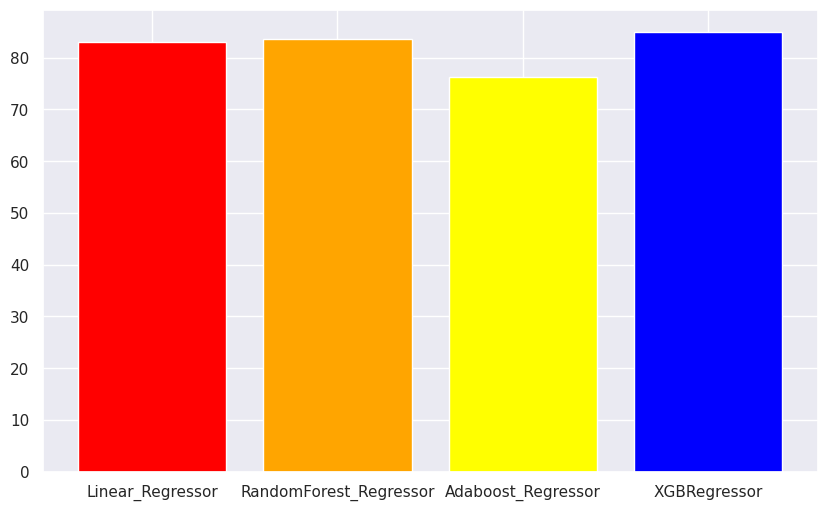

In [ ]:
plt.figure(figsize=(10,6))
x_labels=["Linear_Regressor", "RandomForest_Regressor", "Adaboost_Regressor","XGBRegressor"]
x_pos=np.arange(len(x_labels))
accuracies=[lr_accuracy, rf_accuracy, ada_accuracy,xgb_accuracy]
c=["red","orange","yellow","blue"]
plt.bar(x_pos,accuracies,color=c)
plt.xticks(x_pos,x_labels)
plt.show()

In [ ]:
#accuracies=[lr_accuracy, rf_accuracy, ada_accuracy]
x = np.where(accuracies == np.max(accuracies))[0][0]
print("max accuracy algorithm be:",x_labels[x])
print("& max accuracy be:",accuracies[x])

max accuracy algorithm be: XGBRegressor
& max accuracy be: 85.034
